<a href="https://colab.research.google.com/github/matchonerror/Song_LSTM_ED_sheran/blob/main/song_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description:**
This is a project to make the ML learn a song of Ed Sheeran and generate a new song base on your input sentence
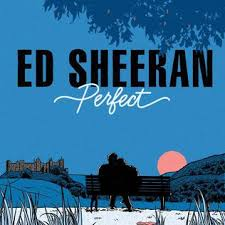

# Import

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense,Dropout,Bidirectional,LSTM,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Build the word vocabulary

In [ ]:
#Define the lyrics song
data="Darling, just dive right in and follow my lead\nWell, I found a girl, beautiful and sweet\nOh, I never knew you were the someone waiting for me\n'Cause we were just kids when we fell in love\nNot knowing what it was\nI will not give you up this time\nBut darling, just kiss me slow\nYour heart is all I own\nAnd in your eyes, you're holding mine\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favourite song\nWhen you said you looked a mess\nI whispered underneath my breath\nBut you heard it\nDarling, you look perfect tonight\nWell, I found a woman, stronger than anyone I know\nShe shares my dreams, I hope that someday I'll share her home\nI found a lover, to carry more than just my secrets\nTo carry love, to carry children of our own\nWe are still kids, but we're so in love\nFighting against all odds\nI know we'll be alright this time\nDarling, just hold my hand\nBe my girl, I'll be your man\nI see my future in your eyes\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favorite song\nWhen I saw you in that dress, looking so beautiful\nI don't deserve this\nDarling, you look perfect tonight\nBaby, I'm dancing in the dark\nWith you between my arms\nBarefoot on the grass\nListening to our favorite song\nI have faith in what I see\nNow I know I have met an angel in person\nAnd she looks perfect\nI don't deserve this\nYou look perfect tonight"

#Spiltting long string per line and put it into a list
corpus=data.lower().split('\n')

#First we lowerize the Capital letter in the song then split it into sentence
#'\n'is a sign to split

#print the corpus
print(corpus)

['darling, just dive right in and follow my lead', 'well, i found a girl, beautiful and sweet', 'oh, i never knew you were the someone waiting for me', "'cause we were just kids when we fell in love", 'not knowing what it was', 'i will not give you up this time', 'but darling, just kiss me slow', 'your heart is all i own', "and in your eyes, you're holding mine", "baby, i'm dancing in the dark", 'with you between my arms', 'barefoot on the grass', 'listening to our favourite song', 'when you said you looked a mess', 'i whispered underneath my breath', 'but you heard it', 'darling, you look perfect tonight', 'well, i found a woman, stronger than anyone i know', "she shares my dreams, i hope that someday i'll share her home", 'i found a lover, to carry more than just my secrets', 'to carry love, to carry children of our own', "we are still kids, but we're so in love", 'fighting against all odds', "i know we'll be alright this time", 'darling, just hold my hand', "be my girl, i'll be your

This corpus is a list which contain all the line (in the form of a long string) in this song.
We've created a corpus. We can pass through the NLP task: Tokenization


##  Tokenization

In [ ]:
#define a tokenizer
tokenizer=Tokenizer()

#fit on the corpus
tokenizer.fit_on_texts(corpus)

#Define the total words. You add 1 for the index `0` which is just the padding token.
total_words=len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'you': 2, 'in': 3, 'my': 4, 'the': 5, 'to': 6, 'darling': 7, 'just': 8, 'and': 9, 'a': 10, 'this': 11, 'your': 12, 'our': 13, 'perfect': 14, 'found': 15, 'we': 16, 'when': 17, 'love': 18, 'but': 19, 'baby': 20, "i'm": 21, 'dancing': 22, 'dark': 23, 'with': 24, 'between': 25, 'arms': 26, 'barefoot': 27, 'on': 28, 'grass': 29, 'listening': 30, 'song': 31, 'look': 32, 'tonight': 33, 'know': 34, 'carry': 35, 'be': 36, 'well': 37, 'girl': 38, 'beautiful': 39, 'were': 40, 'me': 41, 'kids': 42, 'not': 43, 'what': 44, 'it': 45, 'time': 46, 'all': 47, 'own': 48, 'eyes': 49, 'than': 50, 'she': 51, 'that': 52, "i'll": 53, 'so': 54, 'see': 55, 'favorite': 56, "don't": 57, 'deserve': 58, 'have': 59, 'dive': 60, 'right': 61, 'follow': 62, 'lead': 63, 'sweet': 64, 'oh': 65, 'never': 66, 'knew': 67, 'someone': 68, 'waiting': 69, 'for': 70, "'cause": 71, 'fell': 72, 'knowing': 73, 'was': 74, 'will': 75, 'give': 76, 'up': 77, 'kiss': 78, 'slow': 79, 'heart': 80, 'is': 81, "you're": 82, 'holding

## Preprocessing the vocab

Now u preprocessing the vocab by taking each line in the corpus and create the
input sentence xs and their labels ys.



The input_sentence is all the words in the line except the last word.
Their labels are the last words.


For exemple:


In [ ]:
INPUT              LABEL
-----------------------------
I             ---> am
I am          ---> using
I am using    ---> Tensorflow

SyntaxError: invalid syntax (<ipython-input-4-17c1a01433fe>, line 1)

In [ ]:
# Initialize the sequences list
input_sequences=[]
# Loop over every line
for line in corpus:# all the element(line ) in the corpus
	# Tokenize the current line
  tk_line=tokenizer.texts_to_sequences([line])[0]
#tokenizer.texts_to_sequences(['darling, just dive right in and follow my lead'])[0]
  # now we've tokenized a he line in the line for each loop
  # loop 1: first sentence.[2,3,5,4]
  	# Loop over the line several times to generate the subphrases
  for i in range(1, len(tk_line)):
    	# Generate the subphrase
      sub_pharse=tk_line[:i+1]# this is an application of [](slicing) which take from the first elemnts of that list to the i element but not take the i element.This is called n-grams
      	# Append the subphrase to the sequences list
      input_sequences.append(sub_pharse)

        # Get the length of the longest line
max_len = max([len(x) for x in input_sequences])

        # Pad all sequences
pad_seq=np.array(pad_sequences(input_sequences, maxlen=max_len,padding='pre'))
        # Create inputs and label by splitting the last token in the subphrases
xs,label=pad_seq[:,:-1],pad_seq[:,-1]
        # Convert the label into one-hot arrays
ys=to_categorical(label,num_classes=total_words)


**Caution**:

tokenizer.text_to_sequences() expect a list to input so if u give it a string it will convert into a nested list ( which you don't want)

so we have to put a '[]' to solve this problem
And of course, ours desired sentence is the first element in this list with mean we have to put [0] at the end

Now we've achieved the x and y for this problem




In [ ]:
sample=corpus[0].split()

seq1=tokenizer.texts_to_sequences([sample])[0]
seq2=tokenizer.texts_to_sequences(sample)
print(seq1)
print(seq2)

[8, 60, 61, 3, 9, 62, 4, 63]
[[7], [8], [60], [61], [3], [9], [62], [4], [63]]


In [ ]:
#sample is the first sentence in this song
sample=corpus[0].split()

seq=list(tokenizer.texts_to_sequences(sample))

seq_list= list(np.concatenate(seq))
print(sample)
print(seq)
print(seq_list)
type(seq_list)

['darling,', 'just', 'dive', 'right', 'in', 'and', 'follow', 'my', 'lead']
[[7], [8], [60], [61], [3], [9], [62], [4], [63]]
[7, 8, 60, 61, 3, 9, 62, 4, 63]


list

With this exemple, we have the xs like this

In [ ]:
xs=xs.tolist()

It is decoded like this

In [ ]:
n=3

print(xs[n])
print(tokenizer.sequences_to_texts([xs[n]]))

print(ys[n])
print(np.argmax(ys[n]))
print(tokenizer.index_word[3])

[0, 0, 0, 0, 0, 0, 0, 7, 8, 60, 61]
['darling just dive right']
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3
in


In [ ]:
ys=ys.tolist()

In [ ]:
print(tokenizer.sequences_to_texts([xs[7]]))
print(tokenizer.index_word[63])
print(f'this is tokenized sentences={(xs[7])}')

print(f'their labels={np.argmax(ys[7])}')# 63:lead


['darling just dive right in and follow my']
lead
this is tokenized sentences=[0, 0, 0, 7, 8, 60, 61, 3, 9, 62, 4]
their labels=63


# Build the model LSTM

In [ ]:
model=Sequential()
model.add(Embedding(total_words,64,input_length=max_len-1))
# we have to -1 because the length input of the length of the sentence
model.add(Bidirectional(LSTM(64,activation='relu')))
model.add(Dense(32,activation='relu'))
model.add(Dense(total_words,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 64)            8320      
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 130)               4290      
                                                                 
Total params: 82786 (323.38 KB)
Trainable params: 82786 (323.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
hist=model.fit(xs,ys,epochs=500,batch_size=256)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 4.8676 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 53ms/step - loss: 4.8660 - accuracy: 0.0169
Epoch 3/500
1/1 [==============================] - 0s 52ms/step - loss: 4.8644 - accuracy: 0.0211
Epoch 4/500
1/1 [==============================] - 0s 52ms/step - loss: 4.8629 - accuracy: 0.0127
Epoch 5/500
1/1 [==============================] - 0s 57ms/step - loss: 4.8613 - accuracy: 0.0127
Epoch 6/500
1/1 [==============================] - 0s 65ms/step - loss: 4.8596 - accuracy: 0.0127
Epoch 7/500
1/1 [==============================] - 0s 54ms/step - loss: 4.8578 - accuracy: 0.0253
Epoch 8/500
1/1 [==============================] - 0s 52ms/step - loss: 4.8558 - accuracy: 0.0253
Epoch 9/500
1/1 [==============================] - 0s 52ms/step - loss: 4.8536 - accuracy: 0.0295
Epoch 10/500
1/1 [==============================] - 0s 49ms/step - loss: 4.8512 - accuracy: 0.0253
Epoch 11/500
1/1 

## Visualizing the results

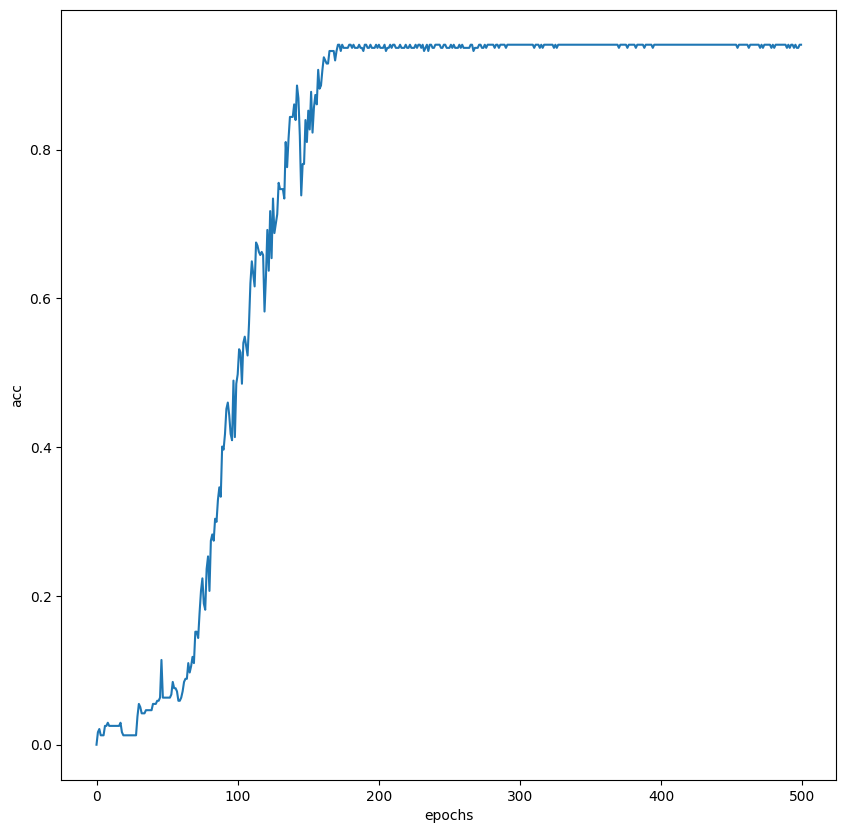

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()


We got the accuarcacy as 94% (not quite bad). We now can pass through the testing

# Generatting Text

Test sentence: `Love me over the moon`.

Let's look as the song with `num_prediction` as 100 (mean that a song with 100 words)



> Ajouter une citation



In [ ]:
test='Love me over the moon'

num_prediction=100

# Loop until desired length is reached
for i in range(num_prediction):

# Convert the seed text to a token sequence
  seq_sed=tokenizer.texts_to_sequences([test])[0]
	# Pad the sequence
  pad_seq_sed=pad_sequences([seq_sed],maxlen=max_len-1,padding='pre')

  # Feed to the model and get the probabilities for each index
  proba=model.predict(pad_seq_sed)

  # Get the index with the highest probability
  predicted_index=np.argmax(proba)


	# Ignore if index is 0 because that is just the padding.
  if predicted_index != 0:
    predicted_word=tokenizer.index_word[predicted_index]
    test +=  " " + predicted_word


print(test)


1/1 [==============================] - 0s 22ms/step
Love me over the moon all i own to own more love to carry more more it your this man we're so up up in love we're up in so dark we're dark up up up up so up time in fell in love mine we're up dark up up time in love we're dark in love we're dark up dark up so in up this so in so in love fell up up up love we're in up in love we're up up up up up so in fell in love mine we're up up up up up in so fell time in mine


The explanation mentions that this approach can lead to repetitive words, especially in longer outputs. This occurs because the model might get stuck in a loop, repeatedly predicting the same word with the highest probability.The solution of this is using `k-sampling`
which choose 3 random highest-probability word

In [ ]:
test='Love me to the moon'
num_pred2=50
for i in range(num_pred2):
  seq_test2=tokenizer.texts_to_sequences([test])[0]
  pad_seq_test2=pad_sequences([seq_test2],maxlen=max_len-1)

  proba2=model.predict(pad_seq_test2)# caulating the probality of each next words

  choice=np.random.choice([1,2,3,4,5])

  predicted_index2=np.argsort(proba2)[0][-choice]# argsort in ascending ordre

  if predicted_index2 != 0:
    predicted_w=tokenizer.index_word[predicted_index2]
    test+= ' ' + predicted_w
    print(test)






1/1 [==============================] - 0s 23ms/step
Love me to the moon to
1/1 [==============================] - 0s 22ms/step
Love me to the moon to of
1/1 [==============================] - 0s 41ms/step
Love me to the moon to of love
1/1 [==============================] - 0s 52ms/step
Love me to the moon to of love i
1/1 [==============================] - 0s 32ms/step
Love me to the moon to of love i carry
1/1 [==============================] - 0s 54ms/step
Love me to the moon to of love i carry love
1/1 [==============================] - 0s 33ms/step
Love me to the moon to of love i carry love and
1/1 [==============================] - 0s 37ms/step
Love me to the moon to of love i carry love and not
1/1 [==============================] - 0s 90ms/step
Love me to the moon to of love i carry love and not love
1/1 [==============================] - 0s 41ms/step
Love me to the moon to of love i carry love and not love in
1/1 [==============================] - 0s 22ms/step
Love me to the 

(237, 11)

(237, 130)